In [1]:
from goobergrad import nn
from goobergrad import eval
import numpy as np
import matplotlib.pyplot as plt
import mnist

# data processing


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalized between 0-1
train_images = train_images / 255
test_images = test_images / 255

5


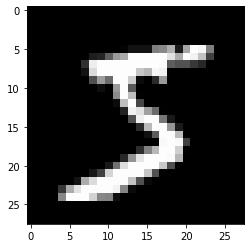

In [4]:
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [5]:
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)


In [6]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# model definition

In [7]:
model = nn.MLP([784, 512, 512, 10])

In [8]:
ypred = model(train_images[0])
ypred


Value(0)
Value(0.21404200686406502)
Value(0.3839759992944023)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0.006679265754540963)
Value(0)
Value(0.5191567874913189)
Value(0)
Value(0.33772724584019986)
Value(0.5634490452916162)
Value(0.15340324468024996)
Value(0.12741707508222655)
Value(0)
Value(0)
Value(0)
Value(0.7086226066293094)
Value(0.10019195403135105)
Value(0.7999133372865959)
Value(0)
Value(0.030536280691556904)
Value(0)
Value(0.40532011071314394)
Value(0)
Value(0.27933454447081585)
Value(0)
Value(0)
Value(0.1169848351524235)
Value(0)
Value(0)
Value(0)
Value(0.11040083673315454)
Value(0)
Value(0.29354059382709474)
Value(0)
Value(0.19633255452325538)
Value(0.2622501746796038)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0.07422604713345146)
Value(0)
Value(0)
Value(0.16154983645144086)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0.2761418300651346)
Value(0.23522626920810752)
Value(0)
Value(0)
Value(0.016478163441757725)
Value(0.3264660463777445)
Value(0.31559816726747514)
Value(0

Value(0.19221829122970543)
Value(0.08097397057945191)
Value(0.517552535906019)
Value(0)
Value(0.15456064837156902)
Value(0)
Value(0)
Value(0.4306881451413954)
Value(0)
Value(0.027947694255913026)
Value(0.08906109287987497)
Value(0)
Value(0.10162475376674279)
Value(0.050706600383587284)
Value(0.03330576461896537)
Value(0.050965739675550153)
Value(0.17793847185228526)
Value(0.07970660407852043)
Value(0.19601636476560502)
Value(0.05985196778472087)
Value(0.2599417546591941)
Value(0.06586733220266688)
Value(0.014702858191193408)
Value(0.12399431205724631)
Value(0.1096155413958049)
Value(0.21648316105911283)
Value(0.04555419341035453)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0.04016894430952749)
Value(0)
Value(0.12256517618370037)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0.16376136419673917)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0)
Value(0.12153839776843811)
Value(0.18801485892286418)
Value(0.34766160692108417)
Value(0)
Value(0.11443363178278396)
Value(0)
Value(0)
Va

Value(0)
Value(0.03424605903856381)
Value(0.13309211631777682)
Value(0.03808127287536324)
Value(0.1339937832604798)
Value(0)


[Value(0.023886836301772258),
 Value(0.1631962662101547),
 Value(0.03020602353347177),
 Value(0),
 Value(0),
 Value(0.03424605903856381),
 Value(0.13309211631777682),
 Value(0.03808127287536324),
 Value(0.1339937832604798),
 Value(0)]

In [10]:
ypred = nn.softmax(ypred)

In [11]:
ypred

[Value(0.09966847030400133),
 Value(0.10111957534214855),
 Value(0.09972958438733412),
 Value(0.09944124300048655),
 Value(0.09944124300048655),
 Value(0.09976887899489825),
 Value(0.10078680626546581),
 Value(0.09980634302413383),
 Value(0.10079661268055845),
 Value(0.09944124300048655)]